In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = np.array([-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90])

соберём design-матрицу (величина матрицы указывается в первой строчке):

In [174]:
k = 3
def design_create(m):
    design = []
    for el in x:
        design.append([el**i for i in range(m+1)])
    return np.array(design)

design_create(k)

array([[ 1.0000000e+00, -1.0000000e+00,  1.0000000e+00, -1.0000000e+00],
       [ 1.0000000e+00, -7.0000000e-01,  4.9000000e-01, -3.4300000e-01],
       [ 1.0000000e+00, -4.3000000e-01,  1.8490000e-01, -7.9507000e-02],
       [ 1.0000000e+00, -1.4000000e-01,  1.9600000e-02, -2.7440000e-03],
       [ 1.0000000e+00, -1.4000000e-01,  1.9600000e-02, -2.7440000e-03],
       [ 1.0000000e+00,  4.3000000e-01,  1.8490000e-01,  7.9507000e-02],
       [ 1.0000000e+00,  7.1000000e-01,  5.0410000e-01,  3.5791100e-01],
       [ 1.0000000e+00,  1.0000000e+00,  1.0000000e+00,  1.0000000e+00],
       [ 1.0000000e+00,  1.2900000e+00,  1.6641000e+00,  2.1466890e+00],
       [ 1.0000000e+00,  1.5700000e+00,  2.4649000e+00,  3.8698930e+00],
       [ 1.0000000e+00,  1.8600000e+00,  3.4596000e+00,  6.4348560e+00],
       [ 1.0000000e+00,  2.1400000e+00,  4.5796000e+00,  9.8003440e+00],
       [ 1.0000000e+00,  2.4300000e+00,  5.9049000e+00,  1.4348907e+01],
       [ 1.0000000e+00,  2.7100000e+00,  7.3441000e

найдём кф многочлена наилучшего приближения:

In [175]:
def get_a(d, y_d): 
    return np.linalg.pinv(d) @ y_d

a = get_a(design_create(k), y)
a

array([ 0.49483598, -0.26983377, -2.01973166,  1.01540301])

посмотрим, что получилось:

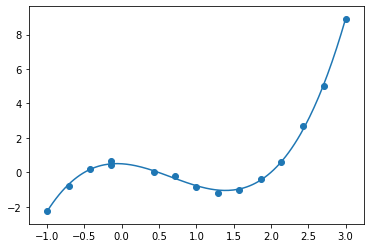

In [176]:
x_design = np.linspace(-1, 3, 200)
y_design = [0]*len(x_design)
for i in range(len(a)):
    for j in range(len(y_design)):
        y_design[j] += a[i]*x_design[j]**i
plt.plot(x_design, y_design)
plt.scatter(x,y)

найдём оптимальное значение m с помощью вычисления $\sigma$:

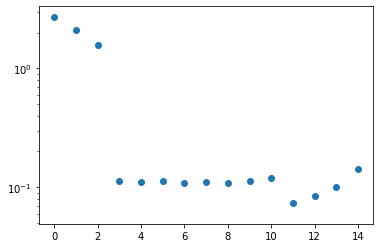

In [170]:
def sigma(x_origin, y_origin, m):
    coef = get_a(design_create(m), y_origin)
    
    y_c = [0]*len(x_origin)
    for i in range(len(coef)):
        for j in range(len(y_c)):
            y_c[j] += coef[i]*x_origin[j]**i
            
    return np.sqrt(sum([(y_c[i] - y_origin[i])**2 for i in range(len(y_origin))])/(len(y_origin) - m))


c = range(15)
dots = [sigma(x, y, i) for i in c]
plt.scatter(c, dots)
plt.yscale('log')

из графика видно, что оптимальное m=3 (есть более точный, но менее выгодный для вычислений вариант m=11)

построим несколько случаев:

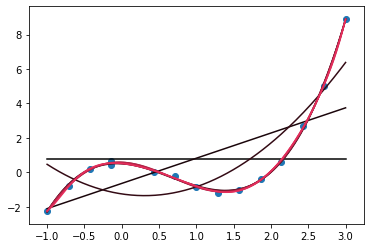

In [183]:
for j in range(10):
    a = get_a(design_create(j), y)
    x_design = np.linspace(-1, 3, 200)
    y_design = [0]*len(x_design)
    for i in range(len(a)):
        for j in range(len(y_design)):
            y_design[j] += a[i]*x_design[j]**i
    plt.plot(x_design, y_design, color=(i/10, i/50, i/25))
plt.scatter(x,y)

посмотрим, что будет, если применять qr-разложение к design-матрице:

In [190]:
k = 3
q, r = np.linalg.qr(design_create(k))
r_inv = np.linalg.inv(r)
a = r_inv @ q.T @ y

array([ 0.49483598, -0.26983377, -2.01973166,  1.01540301])